# 逻辑回归

假设函数：$h(x)=\frac{1}{1+e^{-X\theta}}=p(y=1|X,\theta)=p$

参数：$\theta=(\theta_0,...,\theta_n)^{'}$

最大似然函数：$L=\prod^{m}_{i=1}p^{y^{(i)}}(1-p)^{1-y^{(i)}}$

代价函数：$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\ln(h(x))+(1-y^{(i)})\ln(1-h(x))$

梯度：$\bigtriangledown J(\theta)=\frac{1}{m}X^{'}(h(x)-y)$

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# wh_data = pd.read_csv('../AQI_maincity/武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data = pd.read_csv('武汉.csv', index_col='date', encoding='utf-8', engine='python')
wh_data.drop(wh_data[wh_data['质量等级']=='无'].index, inplace=True)
wh_data.head()

,AQI,质量等级,PM2.5,PM10,SO2,CO,NO2,O3_8h
date,,,,,,,,
2014-01-01,203,重度污染,153,210,70,2.0,106,55
2014-01-02,231,重度污染,181,254,89,2.4,112,26
2014-01-03,224,重度污染,174,226,63,1.7,84,55
2014-01-04,147,轻度污染,112,184,73,1.6,87,40
2014-01-05,195,中度污染,147,213,89,2.2,91,53


In [0]:
def get_grade(aqi):
    if aqi <= 100:
        return '1'
    else:
        return '0'

In [4]:
wh_data['GRADE'] = wh_data.AQI.apply(get_grade)
wh_data.groupby(by='GRADE').size()

GRADE
0     689
1    1125
dtype: int64

In [0]:
X = wh_data.iloc[:, 2:4]
y = wh_data.iloc[:, -1]

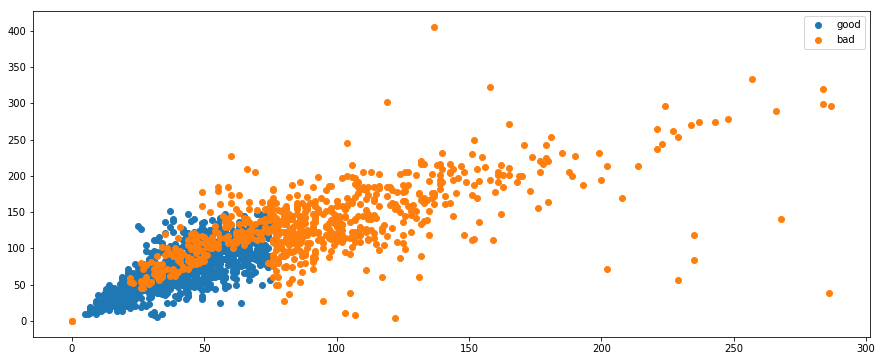

In [6]:
X_good = X[y=='1']
X_bad = X[y=='0']

plt.figure(figsize=(15,6))
plt.scatter(X_good['PM2.5'], X_good['PM10'], label='good')
plt.scatter(X_bad['PM2.5'], X_bad['PM10'], label='bad')
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
log_reg.score(X_test, y_test)

0.8964757709251101

**决策边界**

$X\theta=0$

In [0]:
def plot_decision_boundary(model, axis):
    X0, X1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int(axis[1]-axis[0])).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int(axis[3]-axis[2])).reshape(-1, 1),
    )
    X = np.c_[X0.ravel(), X1.ravel()]
    Y = model.predict(X).reshape(X0.shape)
    
    plt.contourf(X0, X1, Y)

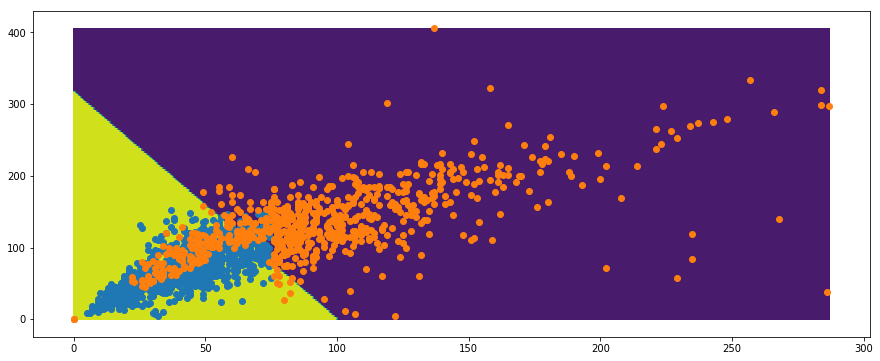

In [11]:
plt.figure(figsize=(15,6))
plot_decision_boundary(log_reg, axis=[np.min(X)[0],np.max(X)[0], np.min(X)[0],np.max(X)[1]])
plt.scatter(X_good['PM2.5'], X_good['PM10'])
plt.scatter(X_bad['PM2.5'], X_bad['PM10'])
plt.show()

**加入多项式特征**

In [0]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [13]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)
poly_log_reg.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9008810572687225

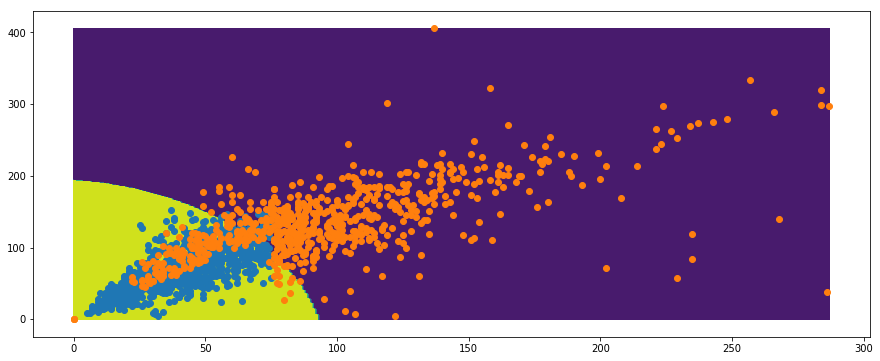

In [14]:
plt.figure(figsize=(15,6))
plot_decision_boundary(poly_log_reg, axis=[np.min(X)[0],np.max(X)[0], np.min(X)[0],np.max(X)[1]])
plt.scatter(X_good['PM2.5'], X_good['PM10'])
plt.scatter(X_bad['PM2.5'], X_bad['PM10'])
plt.show()